# SEANCE 4 -  Statistiques descriptives à une variable

## Objectifs pédagogiques
- Comprendre les **paramètres de position** et de **dispersion**
- Savoir les **calculer avec Python**
- **Interpréter les résultats** en tant qu’ingénieur



À la fin du notebook, un étudiant ingénieur doit être capable de répondre à :

>Que m’apprennent la moyenne, la médiane, l’écart-type ou le boxplot sur un procédé, une mesure ou un produit ?


## Pourquoi utiliser Google Colab pour ce cours (cours / TP)

Dans ce module, nous utilisons **Google Colab** comme environnement de travail pour les séances de **cours et de travaux pratiques**.

Ce choix est **pédagogique** et **volontaire**.

### Objectifs du cours
L’objectif principal n’est pas d’apprendre à installer ou configurer Python, mais de :
- comprendre les **outils statistiques**,
- savoir **analyser des données**,
- interpréter les résultats **en tant qu’ingénieur**.

Google Colab permet de se concentrer sur ces objectifs **sans contrainte technique.**

### Avantages de Google Colab
- Aucun logiciel à installer
- Fonctionne sur tous les systèmes (Windows, macOS, Linux)
- Accès immédiat depuis un navigateur web
- Environnement Python déjà configuré (NumPy, Pandas, Matplotlib)
- Notebooks partagés facilement via un lien

### Positionnement par rapport à Python “classique”
Les notebooks sont particulièrement adaptés pour :
- mélanger **rappels théoriques**, **calculs** et **graphiques**,
- documenter une démarche d’analyse,
- discuter et interpréter les résultats.

Dans un contexte professionnel, il est courant de :
- utiliser des **notebooks** pour l’exploration et l’analyse,
- utiliser des **scripts Python** pour la production ou l’automatisation.

Ce cours se place volontairement dans la **première étape : l’analyse et la compréhension des données**.

### Message clé
> *Un ingénieur ne se contente pas de produire des chiffres :  
il doit comprendre ce qu’ils signifient et être capable de les interpréter.*

Google Colab est un outil adapté à cette démarche.


## Contexte industriel
On étudie le **temps de fabrication (en minutes)** d’une pièce mécanique mesuré sur une série de productions.
L’objectif est d’évaluer la **stabilité du procédé**.

In [ ]:
#import des librairies utiles pour faire des statistiques
import numpy as np #librairie de base de calculs scientifiques -dont les stat)
import pandas as pd #librairie de manipulation de données (lire des données csv, les organiser dans un tableau)
import matplotlib.pyplot as plt #librairie de visualisation (graphiques scientifiques)

### Récapitulatif des bibliothèques Python utilisées

| Bibliothèque | Rôle principal | Utilisation dans ce cours |
|-------------|---------------|----------------------------|
| **NumPy** | Calcul numérique | Calculs statistiques (moyenne, variance, écart-type), tableaux numériques |
| **Pandas** | Manipulation des données | Organisation des données, statistiques descriptives, lecture de fichiers CSV |
| **Matplotlib** | Visualisation | Histogrammes, diagrammes en moustache, graphiques d’analyse |


In [ ]:
temps = np.array([48, 52, 51, 49, 50, 47, 53, 54, 46, 50, 49, 51, 52, 48, 50])
data = pd.Series(temps)
data

,0
0,48
1,52
2,51
3,49
4,50
5,47
6,53
7,54
8,46
9,50


## Paramètres de position

Les paramètres de position résument **où se situe la série de données** (valeur “typique”, niveau moyen, centre de la distribution).

- **Moyenne** $\bar{x}$ :  
  valeur moyenne de l’échantillon.  
  $$
  \bar{x}=\frac{1}{n}\sum_{i=1}^{n} x_i
  $$
  **Interprétation ingénieur :** performance moyenne d’un procédé (temps moyen, dimension moyenne, etc.).  
  **Attention :** la moyenne est sensible aux valeurs extrêmes.

- **Médiane** $\tilde{x}$ :  
  valeur qui **partage l’échantillon ordonné en deux parties de même effectif**.  
  - 50 % des valeurs sont **inférieures ou égales** à la médiane  
  - 50 % des valeurs sont **supérieures ou égales** à la médiane  

  **Méthode de calcul (idée) :**
  1. Trier les données par ordre croissant
  2. Si $n$ est impair : la médiane est la valeur centrale  
  3. Si $n$ est pair : la médiane est la moyenne des deux valeurs centrales  

  **Interprétation ingénieur :** valeur “typique” plus robuste que la moyenne lorsque la distribution est dissymétrique ou en présence de valeurs aberrantes.



In [ ]:
moyenne = data.mean()
mediane = data.median()
moyenne, mediane

(np.float64(50.0), 50.0)

### Etape 1 : Interprétation (ingénieur)
- **La moyenne représente-t-elle bien un temps typique ?**
<details>
<summary><b>Afficher une solution possible</b></summary>
*Oui, la moyenne représente correctement un temps typique dans ce cas.
Les données sont relativement concentrées autour de la moyenne et ne présentent pas de valeurs extrêmement éloignées. Il n’y a pas d’événement exceptionnel qui viendrait fausser la valeur moyenne.*

👉 Lecture ingénieur : *le temps moyen est un bon indicateur de performance globale du procédé.*
</details>

- **La médiane est-elle proche de la moyenne ?**
<details>
<summary><b>Afficher une solution possible</b></summary>
*Oui, la médiane est très proche de la moyenne.
Cela indique que la distribution des données est globalement symétrique et qu’il n’y a pas de déséquilibre important entre les valeurs basses et les valeurs élevées.*

👉 Lecture ingénieur : *la moyenne n’est pas tirée vers le haut ou vers le bas par quelques valeurs isolées.*
</details>

-  **Y a-t-il un biais ou une asymétrie ?**
<details>
<summary><b>Afficher une solution possible</b></summary>
*Non, on n’observe pas de biais ou d’asymétrie marquée.
La proximité entre la moyenne et la médiane, ainsi que la répartition des valeurs autour de ces indicateurs, suggèrent un procédé stable et équilibré.*

👉 Lecture ingénieur : *le procédé fonctionne de manière régulière, sans dérive systématique.*
</details>

### Étape 2 — Présence d’un incident exceptionnel

On ajoute une mesure correspondant à un incident (panne, arrêt machine) ayant fortement augmenté le temps de fabrication.

1) Recalculer la **moyenne** et la **médiane**.
2) Comparer avec les résultats de l’étape 1.
3) Analyser l’impact de cette valeur extrême.


In [ ]:
temps_extreme = np.append(temps, 120)
temps_extreme

array([ 48,  52,  51,  49,  50,  47,  53,  54,  46,  50,  49,  51,  52,
        48,  50, 120])

In [ ]:
#à faire recalculer la moyenne et médiane de temps_extreme
data_extreme = pd.Series(temps_extreme)
data_extreme.mean(),data_extreme.median()



(np.float64(54.375), 50.0)

Rédiger une interprétation argumentée (5 à 8 lignes) répondant aux questions suivantes :

- Quel indicateur est le plus affecté par la valeur extrême ?
- Lequel est le plus représentatif du fonctionnement habituel ?
- Quel indicateur un ingénieur devrait-il privilégier pour analyser le procédé ?

<details>
<summary><b>Afficher une solution possible</b></summary>

### Exemple de correction / interprétation
Dans le cas du fonctionnement normal, la moyenne et la médiane sont très proches, ce qui indique une distribution symétrique et un procédé stable.
Après l’ajout d’une valeur extrême correspondant à un incident exceptionnel, la moyenne augmente fortement tandis que la médiane reste quasiment inchangée.
Cela montre que la moyenne est sensible aux événements rares mais extrêmes, contrairement à la médiane.
Pour analyser le fonctionnement habituel du procédé, la médiane apparaît donc comme un indicateur plus robuste.
La présence de cette valeur extrême suggère un incident ponctuel plutôt qu’un dysfonctionnement global.

**Interprétation ingénieur :**  
La médiane est plus représentative du fonctionnement habituel du procédé en présence d’événements exceptionnels.

</details>


## Paramètres de dispersion

Les paramètres de dispersion décrivent **à quel point les données sont étalées autour d’une valeur centrale**.  
Ils permettent d’évaluer la **stabilité** et la **maîtrise d’un procédé**.

### Variance

La **variance** mesure la **variabilité globale** des données par rapport à la moyenne.

$$
Var(X) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$

- Elle est toujours positive.
- Elle augmente lorsque les valeurs sont très dispersées.
- Son unité est le **carré de l’unité de la variable** (par exemple min², mm²).

**Interprétation ingénieur :**  
Une variance élevée indique un procédé instable ou mal maîtrisé, même si la moyenne est correcte.

---

### Écart-type

L’**écart-type** est la racine carrée de la variance.

$$
\sigma = \sqrt{Var(X)}
$$

- Il s’exprime dans la **même unité que la variable mesurée**.
- Il est plus facile à interpréter que la variance.
- Il représente une **dispersion “typique” autour de la moyenne**.

**Interprétation ingénieur :**  
L’écart-type indique l’ampleur des fluctuations naturelles du procédé.  
Un écart-type faible signifie un procédé régulier et répétable ; un écart-type élevé signale une forte variabilité.

---

### Message clé

> *Deux procédés peuvent avoir la même moyenne, mais des qualités très différentes selon leur dispersion.*

En ingénierie, **la dispersion est souvent plus critique que la moyenne**.


In [ ]:
variance = data.var(ddof=1)
ecart_type = data.std(ddof=1)
variance, ecart_type

(5.0, 2.23606797749979)

## Exemple — Même moyenne, dispersion différente

Deux procédés peuvent produire la **même performance moyenne** (même moyenne), mais avoir une **qualité très différente** si leur dispersion n’est pas la même.

Nous allons comparer deux séries :
- **Procédé A** : production stable (dispersion faible)
- **Procédé B** : production instable (dispersion forte)

Objectif : montrer que **la moyenne seule ne suffit pas**.


In [ ]:
# Pour reproductibilité (mêmes résultats à chaque exécution)
np.random.seed(0)

# Deux séries avec la même moyenne théorique (50) mais dispersions différentes
A = np.random.normal(loc=50, scale=1, size=300)   # faible dispersion
B = np.random.normal(loc=50, scale=5, size=300)   # forte dispersion

sA = pd.Series(A, name="Procédé A (stable)")
sB = pd.Series(B, name="Procédé B (instable)")

#afficher les deux séries
# Création d'un DataFrame avec les deux séries
df = pd.DataFrame({
    "Procédé A (dispersion faible)": sA,
    "Procédé B (dispersion forte)": sB
})

df




,Procédé A (dispersion faible),Procédé B (dispersion forte)
0,51.764052,43.467366
1,50.400157,58.290653
2,50.978738,49.409180
3,52.240893,46.599109
4,51.867558,53.331915
...,...,...
295,51.136891,51.896178
296,50.097725,47.649836
297,50.582954,48.916343
298,49.600551,45.349217


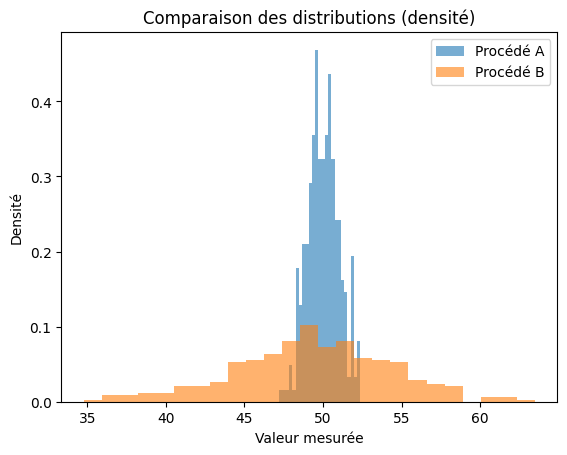

In [ ]:
plt.hist(df["Procédé A (dispersion faible)"], bins=25, density=True, alpha=0.6, label="Procédé A")
plt.hist(df["Procédé B (dispersion forte)"], bins=25, density=True, alpha=0.6, label="Procédé B")

plt.xlabel("Valeur mesurée")
plt.ylabel("Densité")
plt.title("Comparaison des distributions (densité)")
plt.legend()
plt.show()



In [ ]:

# Statistiques
resume = pd.DataFrame({
    "Moyenne": [sA.mean(), sB.mean()],
    "Médiane": [sA.median(), sB.median()],
    "Écart-type": [sA.std(ddof=1), sB.std(ddof=1)],
    "Variance": [sA.var(ddof=1), sB.var(ddof=1)],
    "Min": [sA.min(), sB.min()],
    "Max": [sA.max(), sB.max()]
}, index=["Procédé A", "Procédé B"])

resume

,Moyenne,Médiane,Écart-type,Variance,Min,Max
Procédé A,50.027530,50.024655,1.002373,1.004752,47.227407,52.383145
Procédé B,49.312847,49.347098,5.005915,25.059181,34.769285,63.481120


### Lecture de l’histogramme comparatif

- Les deux distributions sont centrées autour de la même valeur moyenne.
- Le procédé A présente une distribution étroite → faible dispersion.
- Le procédé B présente une distribution beaucoup plus étalée → forte dispersion.

👉 À moyenne égale, la dispersion influence fortement la qualité et la maîtrise du procédé.


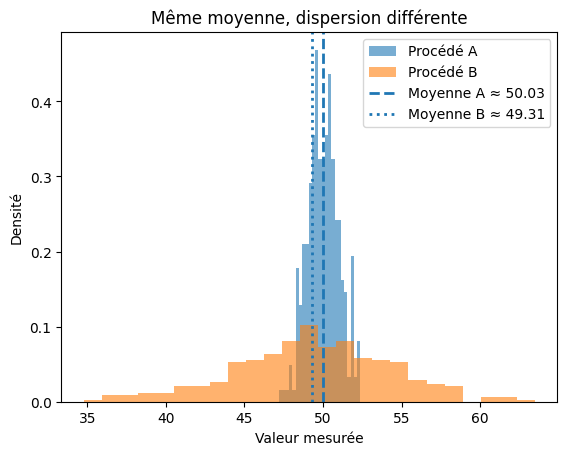

In [ ]:
# Calcul des moyennes
mean_A = df["Procédé A (dispersion faible)"].mean()
mean_B = df["Procédé B (dispersion forte)"].mean()

# Histogrammes
plt.hist(df["Procédé A (dispersion faible)"], bins=25, density=True,
         alpha=0.6, label="Procédé A")
plt.hist(df["Procédé B (dispersion forte)"], bins=25, density=True,
         alpha=0.6, label="Procédé B")

# Lignes verticales pour les moyennes
plt.axvline(mean_A, linestyle="--", linewidth=2, label=f"Moyenne A ≈ {mean_A:.2f}")
plt.axvline(mean_B, linestyle=":", linewidth=2, label=f"Moyenne B ≈ {mean_B:.2f}")

# Mise en forme
plt.xlabel("Valeur mesurée")
plt.ylabel("Densité")
plt.title("Même moyenne, dispersion différente")
plt.legend()
plt.show()


## Quartiles et statistiques robustes

Les **quartiles** permettent de décrire la répartition des données sans faire d’hypothèse sur leur forme (normalité, symétrie, etc.).  
Ils sont particulièrement utiles lorsque la moyenne et l’écart-type sont insuffisants ou trompeurs.

### Définition des quartiles

Après avoir **ordonné les données par ordre croissant** :

- **Premier quartile $Q_1$** :  
  valeur en dessous de laquelle se situent **25 %** des observations.

- **Deuxième quartile $Q_2$ (médiane)** :  
  valeur qui partage l’échantillon en deux parties de même effectif  
  (50 % des valeurs sont en dessous, 50 % au-dessus).

- **Troisième quartile $Q_3$** :  
  valeur en dessous de laquelle se situent **75 %** des observations.

---

### Ce que les quartiles apportent en plus

Contrairement à la moyenne et à l’écart-type :

- les quartiles sont **peu sensibles aux valeurs extrêmes**,
- ils décrivent **la distribution réelle des données**,
- ils permettent d’analyser la dispersion **au cœur des données**.

On peut ainsi étudier :
- la concentration de 50 % des valeurs centrales,
- la dissymétrie de la distribution,
- la présence éventuelle d’anomalies.

---

### Intervalle interquartile (IQR)

L’**intervalle interquartile** est défini par :

$$
IQR = Q_3 - Q_1
$$

- Il contient **50 % des valeurs centrales**.
- C’est une mesure **robuste de dispersion**.

**Interprétation ingénieur :**  
Un IQR faible indique un procédé régulier et maîtrisé ;  
un IQR élevé signale une variabilité importante au cœur du procédé.

---

### Comparaison avec la moyenne et l’écart-type

| Indicateur | Sensibilité aux valeurs extrêmes | Ce qu’il décrit |
|----------|--------------------------------|----------------|
| Moyenne | Forte | Niveau moyen global |
| Écart-type | Forte | Dispersion globale |
| Médiane | Faible | valeur centrale |
| Quartiles / IQR | Faible | Répartition centrale des données |

---

### Message clé

> *Les quartiles décrivent ce que fait le procédé la plupart du temps,  
pas ce qui arrive exceptionnellement.*

Ils sont donc essentiels pour analyser des données


In [ ]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.50)
q3 = data.quantile(0.75)
q1, q2, q3

(np.float64(48.5), np.float64(50.0), np.float64(51.5))

### Visualisation graphique : Diagramme en moustache (boxplot)

Le **diagramme en moustache** est une représentation graphique basée sur les **quartiles**.  
Il permet de résumer rapidement la **position**, la **dispersion** et la **forme** d’une distribution.

---

### Éléments du diagramme

Le boxplot est composé de :

- **La boîte (le rectangle)** :
  - borne inférieure : $Q_1$ (25 % des valeurs)
  - borne supérieure : $Q_3$ (75 % des valeurs)
  - elle contient **50 % des données centrales**

- **La ligne dans la boîte** :
  - correspond à la **médiane** $Q_2$

- **Les moustaches** :
  - s’étendent vers les valeurs les plus éloignées **non aberrantes**
  - typiquement jusqu’à $Q_1 - 1{,}5 \times IQR$ et $Q_3 + 1{,}5 \times IQR$

- **Les points isolés (s’il y en a)** :
  - représentent des **valeurs aberrantes** (outliers)

---

### Ce que permet de lire un boxplot

Un diagramme en moustache permet de répondre visuellement aux questions suivantes :

- Où se situe la majorité des données ?
- Quelle est la dispersion du cœur de la distribution ?
- La distribution est-elle symétrique ou dissymétrique ?
- Existe-t-il des valeurs atypiques ?
- Le procédé est-il stable ou présente-t-il des anomalies ?

---

### Intérêt en ingénierie

En contexte industriel, le boxplot est particulièrement utile pour :

- comparer plusieurs procédés ou séries de mesures,
- détecter des incidents ponctuels (pannes, erreurs, dérives),
- évaluer la régularité d’un procédé,
- analyser des données sans hypothèse de loi normale.

---

### Message clé

> *Le diagramme en moustache montre comment se répartissent les données,  
pas seulement leur valeur moyenne.*

C’est un outil essentiel pour une **analyse robuste** des données.


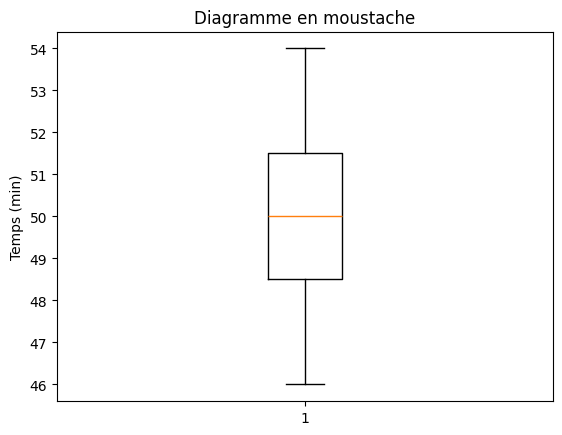

In [ ]:
plt.boxplot(data)
plt.ylabel('Temps (min)')
plt.title('Diagramme en moustache')
plt.show()

#Pour vous exercer :
## Contexte

Une entreprise fabrique une pièce mécanique dont une **dimension critique** doit être maîtrisée.

Deux procédés de fabrication sont testés :
- **Procédé A** : procédé historique
- **Procédé B** : nouveau procédé proposé

La dimension mesurée (en mm) est relevée sur **50 pièces** pour chaque procédé.

Objectif : déterminer **quel procédé est le plus maîtrisé**, du point de vue statistique et industriel.

On vous fournit un fichier comparaison_procedes.csv (à télécharger sur le site http://maths-insic-proba.mmi-stdie.fr dans la seance 4) qui contient les données récupérées sur les dimensions des deux procédés de fabrication.

### Chargement des données CSV dans Google Colab

Pour utiliser les données fournies :

1. Cliquez sur l’icône **Fichiers** (📁) à gauche de l’écran.
2. Cliquez sur **Upload** et téléversez le fichier CSV.
3. Vérifiez que le fichier apparaît dans la liste.
4. Chargez-le dans Python avec :

```python
df = pd.read_csv("comparaison_procedes.csv")
#séparation des deux séries
A = df["procédé_A"]
B = df["procédé_B"]
```


---


> *Dans un contexte industriel, les données sont presque toujours fournies sous forme de fichiers.  
Savoir les importer est une compétence essentielle.*

---




## Travail demandé (Partie1):
lien du notebook **à envoyer à l'adresse : (frederique.beaudeux@univ-lorraine.fr)**


1) Calculer pour chaque procédé :
- moyenne
- médiane
- écart-type
- quartiles

2) Représenter graphiquement :
- histogrammes comparés
- diagrammes en moustache comparés

3) Analyser et comparer :
- la position des données,
- la dispersion,
- la présence éventuelle de valeurs aberrantes.

4) Conclusion (argumentaire à rédiger, 10–15 lignes) :
- Quel procédé est le plus maîtrisé ?
- La moyenne est-elle un critère suffisant ?
- Quel procédé recommanderiez-vous pour une production industrielle ?
Justifier votre réponse à l’aide des indicateurs statistiques et des graphiques.


Les décisions doivent s’appuyer sur :
- des indicateurs statistiques (position et dispersion),
- des graphiques,
- une argumentation claire et structurée.
